tensor([[  7.0000, 184.0000,  84.0000,  ...,  35.5000,   0.3550,  41.0000],
        [  6.0000,  85.0000,  78.0000,  ...,  31.2000,   0.3820,  42.0000],
        [  2.0000, 106.0000,  64.0000,  ...,  30.5000,   1.4000,  34.0000],
        ...,
        [  1.0000,  97.0000,  70.0000,  ...,  38.1000,   0.2180,  30.0000],
        [  6.0000, 190.0000,  92.0000,  ...,  35.5000,   0.2780,  66.0000],
        [  4.0000, 144.0000,  58.0000,  ...,  29.5000,   0.2870,  37.0000]])
Epoch number: 1 with loss 0.7325447201728821
Epoch number: 11 with loss 0.6600156426429749
Epoch number: 21 with loss 0.6357854008674622
Epoch number: 31 with loss 0.6232737302780151
Epoch number: 41 with loss 0.6109457612037659
Epoch number: 51 with loss 0.5912511348724365
Epoch number: 61 with loss 0.5709356665611267
Epoch number: 71 with loss 0.5492481589317322
Epoch number: 81 with loss 0.5332964658737183
Epoch number: 91 with loss 0.5167083740234375
Epoch number: 101 with loss 0.5048837065696716
Epoch number: 111 with l

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

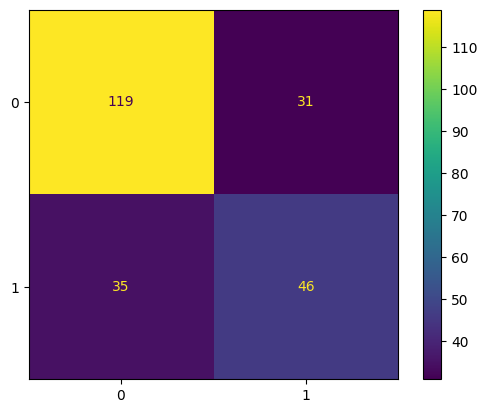

In [41]:
# Question 1

''' 
Adam belongs to the class of gradient-based models, which means it adjusts parameters by following the slope, or gradient, of all errors to find the optimal path. 
Specifically, Adam is designed for stochastic objectives, where the data is processed in small, random batches rather than all at once.
The advantage here is that Adam adjusts automatically based on the problem, relying on estimates of mean and variance of the slope. Consequently, Adam works well for large datasets 
where the objective can change or when the data is noisy. Unlike some of the other algorithms we've used in class, Adam requires minimal programmer input to function once setup.
'''

import pandas as pd
import torch

diabetes_df = pd.read_csv("diabetes.csv")

from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

import torch.nn as nn
import torch.nn.functional as F # functional has the activation functions

#create tensors from the data
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)

# artificial neural network
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,
                 hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__() 

        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        #apply activation function
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x
    
torch.manual_seed(42)

# create an instance of the model
ann = ANN_Model()
# loss function 
loss_function = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)

# run model through various epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() #zeros the gradient before running backward propagation
    loss.backward() # working to minimize the loss function using backward propagation
    optimizer.step() # perform one optimization step each function

    
# predictions
y_pred = []

with torch.no_grad(): # this will decrease memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 
        # returns the index with the max
        # element in each position set
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


Epoch number: 1 with loss 0.9490594863891602
Epoch number: 11 with loss 0.39663293957710266
Epoch number: 21 with loss 0.33773013949394226
Epoch number: 31 with loss 0.31750574707984924
Epoch number: 41 with loss 0.3104802072048187
Epoch number: 51 with loss 0.3056982457637787
Epoch number: 61 with loss 0.30369287729263306
Epoch number: 71 with loss 0.30205824971199036
Epoch number: 81 with loss 0.3006945252418518
Epoch number: 91 with loss 0.2995695173740387
Epoch number: 101 with loss 0.298628568649292
Epoch number: 111 with loss 0.2980600595474243
Epoch number: 121 with loss 0.29797303676605225
Epoch number: 131 with loss 0.2967045307159424
Epoch number: 141 with loss 0.29618608951568604
Epoch number: 151 with loss 0.2957552671432495
Epoch number: 161 with loss 0.2952035665512085
Epoch number: 171 with loss 0.294598251581192
Epoch number: 181 with loss 0.29384320974349976
Epoch number: 191 with loss 0.29384663701057434
Epoch number: 201 with loss 0.2931564450263977
Epoch number: 211

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

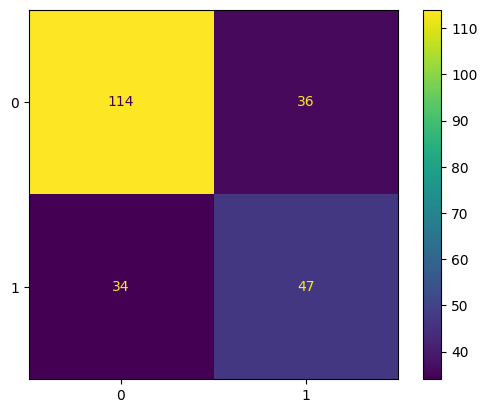

In [ ]:
# Implementing AdaMax

# optimizer
optimizer = torch.optim.Adamax(ann.parameters(), lr=0.01)

# run model through various epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad()  # zero the gradient before backward propagation
    loss.backward()        # minimize the loss function using backward propagation
    optimizer.step()       # perform one optimization step each iteration

# predictions
y_pred = []

with torch.no_grad():  # decrease memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())  # returns the index with the max element

# Evaluate the performance
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# TAKEAWAYS

From the above, we can see that the AdaMax optimization function, which is a variant of Adam that weighs the highest changes in the data more heavily than Adam (which tends to take the average of the size of the changes), is about equal in performance to Adam. The scores are:

Adam - AdaMax
(TP) 46 - 47
(TN) 119 - 114
(FN) 31 - 36
(FP) 35 - 34

From this, we can summarize that Adam is better at minimizing false negatives making it's recall higher for positive cases, while AdaMax slightly reduces false positives, improving precision at the cost of missing more true positives. Thus, we should use Adam if catching all positive cases is critical, or AdaMax if false positives are more disasterous.